### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [29]:
bins_i_want  =  [0, 0.05, 0.1, 0.5,2, 3, 7, 10,15, 21, 35,45, 62, 78]

In [75]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    if filter_small_vals:
        precipitation_data = precipitation_data[(precipitation_data >= 0.5) & (precipitation_data <= 1.5)]
    
    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres

# def calculate_ccdf_wetvalues_alldata(precipitation_data, filter_small_vals=False, bins=8):
#     # Remove NAN values
#     precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
#     # Keep only wet values 
#     precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
#     if filter_small_vals:
#         precipitation_data = precipitation_data[(precipitation_data >= 0.5) & (precipitation_data <= 1.5)]
    
#     # Compute the cumulative distribution function (CDF) using the histogram
#     # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
#     # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
#     # np.cumsum(): Compute the cumulative sum of the products
#     # cdf: The cumulative distribution function values
#     hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
#     cdf = np.cumsum(hist * np.diff(bin_edges))
    
#     # Calculate 1 - CDF for CCDF
#     ccdf = 1 - cdf
    
#     # Find the centre point of each bin for plotting
#     bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
#     return cdf, ccdf, bin_centres

In [76]:
bins_i_want  =  [0, 0.05, 0.1, 0.5,2, 3, 7, 10,15, 21, 35,45, 62, 78]
bin_num = len(bins_i_want)-1

In [4]:
resolution = '12km'

### Get observations data for overlapping and not overlapping time periods

In [42]:
obs_data_overlap = np.array([])
obs_data_no_overlap = np.array([])

datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/{resolution}/NearestNeighbour/'

for yr in range(1990,2014):
    file_name = datadir + f"{yr}_compressed.npy"
    this_yr = np.load(file_name)
    obs_data_no_overlap =np.append(obs_data_overlap, this_yr)
    if yr >=1990 and yr <=2001:
         obs_data_overlap =np.append(obs_data_overlap, this_yr)

### Get model data for overlapping and not overlapping time periods

In [74]:
ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

model_data_overlap = np.array([])
model_data_no_overlap = np.array([])
for em in ems:
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km_regridded_12km/1980_2001/{em}/'
    for yr in range(1981,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        this_yr = np.load(file_name)
        model_data_no_overlap =np.append(model_data_no_overlap, this_yr)
        if yr >=1990 and yr <=2001:
            model_data_overlap =np.append(model_data_overlap, this_yr)


## Calculate CDFs and CCDFs

In [99]:
bins_i_want =  [0.05, 0.1, 0.5,2, 3, 7, 10,15, 21, 35,45, 62, 78]
low_bins_i_want = [0.85, 0.95, 1.05, 1.15]

In [82]:
obs_overlap_cdf, obs_overlap_ccdf, obs_overlap_bin_centres = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
model_overlap_cdf, model_overlap_ccdf, model_overlap_bin_centres = calculate_ccdf_wetvalues(model_data_overlap,bins_i_want)

In [100]:
obs_overlap_cdf_low, obs_overlap_ccdf_low, obs_overlap_bin_centres_low = calculate_ccdf_wetvalues(obs_data_overlap, low_bins_i_want)
model_overlap_cdf_low, model_overlap_ccdf_low, model_overlap_bin_centres_low = calculate_ccdf_wetvalues(model_data_overlap,low_bins_i_want)

In [83]:
obs_no_overlap_cdf, obs_no_overlap_ccdf, obs_no_overlap_bin_centres = calculate_ccdf_wetvalues(obs_data_no_overlap, bins_i_want)
model_no_overlap_cdf, model_no_overlap_ccdf, model_no_overlap_bin_centres = calculate_ccdf_wetvalues(model_data_no_overlap, bins_i_want)

### Plot

In [93]:
# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='CEH-GEAR')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18')
patches.append(patch1)
patches.append(patch2)

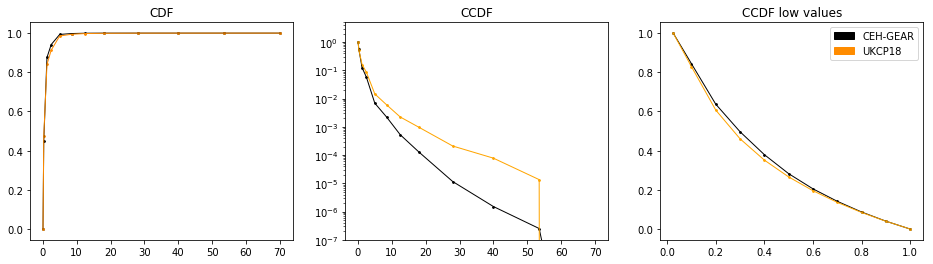

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_centres, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_centres,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_centres, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_centres,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_overlap_bin_centres, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_overlap_bin_centres,obs_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_centres, model_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(model_overlap_bin_centres,model_overlap_ccdf ,linewidth = 1, color = 'orange')
axs[1].set_yscale('log')
axs[1].set_ylim(1e-7,5)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_centres_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_centres_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_centres_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
axs[2].plot(model_overlap_bin_centres_low,model_overlap_ccdf_low ,linewidth = 1, color = 'orange')
axs[2].set_title('CCDF low values')
axs[2].legend(handles=patches);

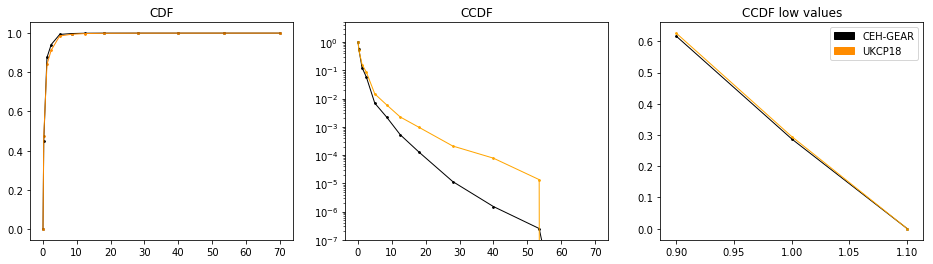

In [105]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_centres, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_centres,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_centres, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_centres,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')

axs[1].scatter(obs_overlap_bin_centres, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_overlap_bin_centres,obs_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_centres, model_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(model_overlap_bin_centres,model_overlap_ccdf ,linewidth = 1, color = 'orange')
axs[1].set_yscale('log')
axs[1].set_ylim(1e-7,5)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_centres_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_centres_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_centres_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
axs[2].plot(model_overlap_bin_centres_low,model_overlap_ccdf_low ,linewidth = 1, color = 'orange')
axs[2].set_title('CCDF low values')
axs[2].legend(handles=patches)
# axs[2].set_ylim(0.1,0.8);

(1e-07, 5)

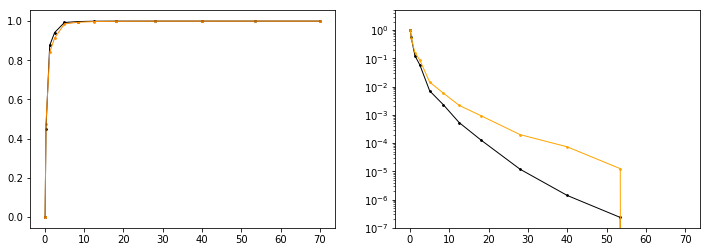

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].scatter(obs_no_overlap_bin_centres, obs_no_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_no_overlap_bin_centres,obs_no_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_no_overlap_bin_centres, model_no_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_no_overlap_bin_centres,model_no_overlap_cdf ,linewidth = 1, color = 'darkorange')

axs[1].scatter(obs_no_overlap_bin_centres, obs_no_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_no_overlap_bin_centres,obs_no_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_no_overlap_bin_centres, model_no_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(model_no_overlap_bin_centres,model_no_overlap_ccdf ,linewidth = 1, color = 'orange')

axs[1].set_yscale('log')
axs[1].set_ylim(1e-7,5)

### Get UKCP18 data for overlapping time period

In [ ]:
ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

model_data_overlap = np.array([])
for em in ems:
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km_regridded_12km/1980_2001/{em}/'
    for yr in range(1981,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        this_yr = np.load(file_name)
        model_data_overlap =np.append(model_data_overlap, this_yr)

In [ ]:
def calculate_ccdf_wetvalues(file_name, filter_small_vals=False, bins=8):
    # Get the data
    precipitation_data = np.load(file_name)
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    if filter_small_vals:
        precipitation_data = precipitation_data[(precipitation_data >= 0.5) & (precipitation_data <= 1.5)]
    
    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres


low_bins_i_want =  [0.05,0.85,0.95,1.05,1.15]
bin_num=len(low_bins_i_want)-1
# # Initialize variables to accumulate PDF
total_pdf_cehgear_wv_low = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_cehgear_wv_low = None
 
# Process each file and accumulate PDF
datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/{resolution}/NearestNeighbour/'
for yr in range(1990,2001):
    print(yr)
    file_name = datadir + f"{yr}_compressed.npy"
    pdf_cehgear_wv_low, bin_centers_cehgear_wv_low = calculate_ccdf_wetvalues(file_name,True, bin_num)
    total_pdf_cehgear_wv_low += pdf_cehgear_wv_low
    total_bin_centers_cehgear_wv_low = bin_centers_cehgear_wv_low


In [100]:
# Get the data
precipitation_data_obs = test_d_all_obs
# Remove NAN values
precipitation_data_obs = precipitation_data_obs[~np.isnan(precipitation_data_obs)]
# Keep only wet values 
precipitation_data_obs = precipitation_data_obs[precipitation_data_obs >= 0.1]

# Compute the cumulative distribution function (CDF) using the histogram
# np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
# hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
# np.cumsum(): Compute the cumulative sum of the products
# cdf: The cumulative distribution function values
hist, bin_edges = np.histogram(precipitation_data_obs, bins=bins_i_want, density=True)
obs_cdf = np.cumsum(hist * np.diff(bin_edges))

# Calculate 1 - CDF for CCDF
obs_ccdf = 1 - obs_cdf

# Find the centre point of each bin for plotting
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

In [92]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# axs[0].scatter(bin_centres, obs_cdf ,linewidth = 1,s=3, color = 'black')
# axs[0].plot(bin_centres,obs_cdf ,linewidth = 1, color = 'black')
# axs[1].set_yscale('log')
# axs[1].set_xscale('linear')    

In [88]:
print(len(test_d_model_all))
print(len(test_d_model_all_oneem))

832429440
68307840


In [ ]:
# Get the data
precipitation_data_model_all = test_d_model_all
# Remove NAN values
precipitation_data_model_all = precipitation_data_model_all[~np.isnan(precipitation_data_model_all)]
# Keep only wet values 
precipitation_data_model_all = precipitation_data_model_all[precipitation_data_model_all >= 0.1]

# Compute the cumulative distribution function (CDF) using the histogram
# np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
# hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
# np.cumsum(): Compute the cumulative sum of the products
# cdf: The cumulative distribution function values
hist, bin_edges = np.histogram(precipitation_data_model_all, bins=bins_i_want, density=True)
model_all_cdf = np.cumsum(hist * np.diff(bin_edges))

# Calculate 1 - CDF for CCDF
model_all_ccdf = 1 - model_all_cdf

# Find the centre point of each bin for plotting
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

In [101]:
# Get the data
precipitation_data_model_oneem = test_d_model_all_oneem
# Remove NAN values
precipitation_data_model_oneem = precipitation_data_model_oneem[~np.isnan(precipitation_data_model_oneem)]
# Keep only wet values 
precipitation_data_model_oneem = precipitation_data_model_oneem[precipitation_data_model_oneem >= 0.1]

# Compute the cumulative distribution function (CDF) using the histogram
# np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
# hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
# np.cumsum(): Compute the cumulative sum of the products
# cdf: The cumulative distribution function values
hist, bin_edges = np.histogram(precipitation_data_model_oneem, bins=bins_i_want, density=True)
model_oneem_cdf = np.cumsum(hist * np.diff(bin_edges))

# Calculate 1 - CDF for CCDF
model_oneem_ccdf = 1 - model_oneem_cdf

# Find the centre point of each bin for plotting
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

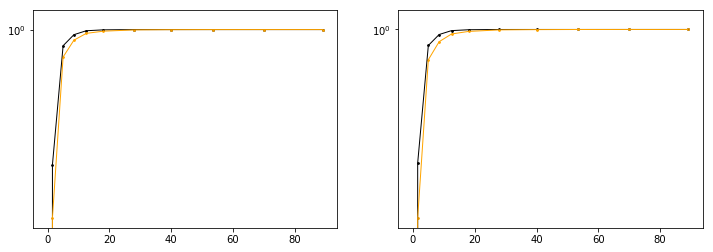

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].scatter(bin_centres, cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(bin_centres,cdf ,linewidth = 1, color = 'black')
axs[0].scatter(bin_centres, model_oneem_cdf ,linewidth = 1,s=3, color = 'orange')
axs[0].plot(bin_centres,model_oneem_cdf ,linewidth = 1, color = 'orange')

axs[0].set_yscale('log')
axs[0].set_xscale('linear')   
# axs[0].set_ylim(1e-7,5)

axs[1].scatter(bin_centres, cdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(bin_centres,cdf ,linewidth = 1, color = 'black')
axs[1].scatter(bin_centres, model_all_cdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(bin_centres,model_all_cdf ,linewidth = 1, color = 'orange')

axs[1].set_yscale('log')
axs[1].set_xscale('linear')   
# axs[1].set_ylim(1e-7,5)

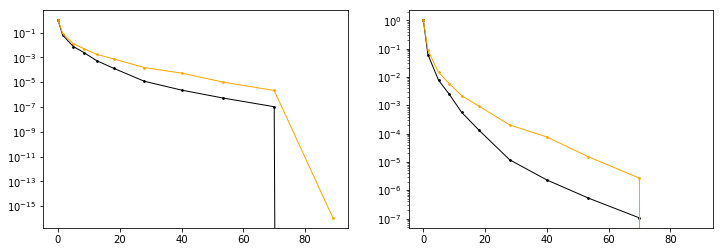

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].scatter(bin_centres, ccdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(bin_centres,ccdf ,linewidth = 1, color = 'black')
axs[0].scatter(bin_centres, model_oneem_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[0].plot(bin_centres,model_oneem_ccdf ,linewidth = 1, color = 'orange')

axs[0].set_yscale('log')
axs[0].set_xscale('linear')   
# axs[0].set_ylim(1e-7,5)

axs[1].scatter(bin_centres, ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(bin_centres,ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(bin_centres, model_all_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(bin_centres,model_all_ccdf ,linewidth = 1, color = 'orange')

axs[1].set_yscale('log')
axs[1].set_xscale('linear')   
# axs[1].set_ylim(1e-7,5)

### Low values

In [188]:
low_bins_i_want =  [0.1,0.85,0.95,1.05,1.15]
low_bins_i_want = [0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]

In [189]:
# Get the data
precipitation_data_obs = test_d_all_obs
# Remove NAN values
precipitation_data_obs = precipitation_data_obs[~np.isnan(precipitation_data_obs)]
# Keep only wet values 
precipitation_data_obs = precipitation_data_obs[precipitation_data_obs >= 0.1]
print(len(precipitation_data_obs))
precipitation_data_obs = precipitation_data_obs[precipitation_data_obs <1.15]
print(len(precipitation_data_obs))
# Compute the cumulative distribution function (CDF) using the histogram
# np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
# hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
# np.cumsum(): Compute the cumulative sum of the products
# cdf: The cumulative distribution function values
hist, bin_edges = np.histogram(precipitation_data_obs, bins=low_bins_i_want, density=True)
obs_cdf_low = np.cumsum(hist * np.diff(bin_edges))

# Calculate 1 - CDF for CCDF
obs_ccdf_low = 1 - obs_cdf_low

# Find the centre point of each bin for plotting
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

350663
254886


In [190]:
# Get the data
precipitation_data_model_all = test_d_model_all
# Remove NAN values
precipitation_data_model_all = precipitation_data_model_all[~np.isnan(precipitation_data_model_all)]
# Keep only wet values 
precipitation_data_model_all = precipitation_data_model_all[precipitation_data_model_all >= 0.1]
print(len(precipitation_data_model_all))
precipitation_data_model_all = precipitation_data_model_all[precipitation_data_model_all <1.15]
# Compute the cumulative distribution function (CDF) using the histogram
# np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
# hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
# np.cumsum(): Compute the cumulative sum of the products
# cdf: The cumulative distribution function values
hist, bin_edges = np.histogram(precipitation_data_model_all, bins=low_bins_i_want, density=True)
model_all_cdf = np.cumsum(hist * np.diff(bin_edges))

# Calculate 1 - CDF for CCDF
model_all_ccdf = 1 - model_all_cdf

# Find the centre point of each bin for plotting
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

78398817


In [191]:
# Get the data
precipitation_data_model_oneem = test_d_model_all_oneem
# Remove NAN values
precipitation_data_model_oneem = precipitation_data_model_oneem[~np.isnan(precipitation_data_model_oneem)]
# Keep only wet values 
precipitation_data_model_oneem = precipitation_data_model_oneem[precipitation_data_model_oneem >= 0.1]

# Compute the cumulative distribution function (CDF) using the histogram
# np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
# hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
# np.cumsum(): Compute the cumulative sum of the products
# cdf: The cumulative distribution function values
hist, bin_edges = np.histogram(precipitation_data_model_oneem, bins=low_bins_i_want, density=True)
model_oneem_cdf = np.cumsum(hist * np.diff(bin_edges))

# Calculate 1 - CDF for CCDF
model_oneem_ccdf = 1 - model_oneem_cdf

# Find the centre point of each bin for plotting
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

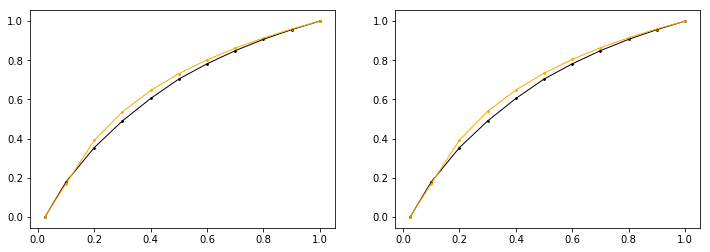

In [192]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].scatter(bin_centres, obs_cdf_low ,linewidth = 1,s=3, color = 'black')
axs[0].plot(bin_centres,obs_cdf_low ,linewidth = 1, color = 'black')
axs[0].scatter(bin_centres, model_oneem_cdf ,linewidth = 1,s=3, color = 'orange')
axs[0].plot(bin_centres,model_oneem_cdf ,linewidth = 1, color = 'orange')

# axs[0].set_yscale('log')
# axs[0].set_ylim(1e-7,5)

axs[1].scatter(bin_centres, obs_cdf_low ,linewidth = 1,s=3, color = 'black')
axs[1].plot(bin_centres,obs_cdf_low ,linewidth = 1, color = 'black')
axs[1].scatter(bin_centres, model_all_cdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(bin_centres,model_all_cdf ,linewidth = 1, color = 'orange')

# axs[1].set_yscale('log')
# axs[1].set_ylim(1e-7,5)

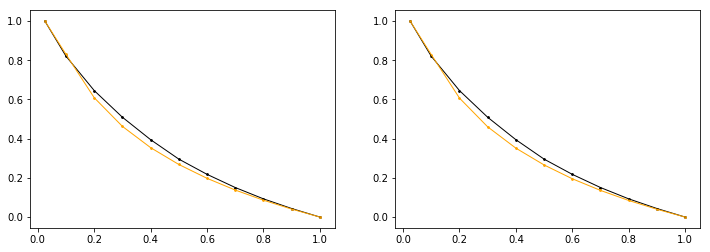

In [193]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].scatter(bin_centres, obs_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[0].plot(bin_centres,obs_ccdf_low ,linewidth = 1, color = 'black')
axs[0].scatter(bin_centres, model_oneem_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[0].plot(bin_centres,model_oneem_ccdf ,linewidth = 1, color = 'orange')

# axs[0].set_yscale('log')
# axs[0].set_ylim(1e-7,5)

axs[1].scatter(bin_centres, obs_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[1].plot(bin_centres,obs_ccdf_low ,linewidth = 1, color = 'black')
axs[1].scatter(bin_centres, model_all_ccdf ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(bin_centres,model_all_ccdf ,linewidth = 1, color = 'orange')

# axs[1].set_yscale('log')
# axs[1].set_ylim(1e-7,5)

In [141]:
test_d_all_obs = np.array([])
datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/{resolution}/NearestNeighbour/'
for yr in range(1990,1991):
    file_name = datadir + f"{yr}_compressed.npy"
    test_d = np.load(file_name)
    test_d_all_obs =np.append(test_d_all_obs, test_d)
    print(len(test_d_all_obs))
    
    
    # Get the data
    precipitation_data_obs = test_d_all_obs
    # Remove NAN values
    precipitation_data_obs = precipitation_data_obs[~np.isnan(precipitation_data_obs)]
    # Keep only wet values 
    precipitation_data_obs = precipitation_data_obs[precipitation_data_obs >= 0.1]
    print(len(precipitation_data_obs))
    precipitation_data_obs = precipitation_data_obs[precipitation_data_obs <1.15]
    print(len(precipitation_data_obs))
    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data_obs, bins=low_bins_i_want, density=True)
    obs_cdf_low = np.cumsum(hist * np.diff(bin_edges))

    # Calculate 1 - CDF for CCDF
    obs_ccdf_low = 1 - obs_cdf_low

    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

3550464
350663
254886


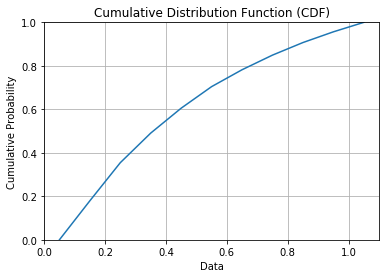

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data (replace this with your own data)
data =  precipitation_data_obs
# Compute the histogram
hist, bin_edges = np.histogram(data, bins=bins_i_want, density=True)

# Calculate the cumulative sum of the histogram values
cumulative_prob = np.cumsum(hist * np.diff(bin_edges))
# Plot the CDF with linear interpolation
plt.plot(bin_edges[1:], cumulative_prob, marker='', linestyle='-')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.ylim(0,1)
# Show grid
plt.grid(True)

# Show the plot
plt.show()

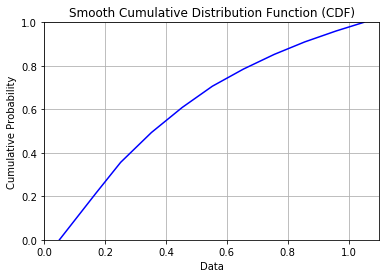

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate example data (replace this with your own data)
# Compute the histogram
hist, bin_edges = np.histogram(data, bins=bins_i_want, density=True)

# Calculate the cumulative sum of the histogram values
cumulative_prob = np.cumsum(hist * np.diff(bin_edges))

# Normalize the cumulative probabilities to ensure CDF starts at 0 and ends at 1
cumulative_prob /= cumulative_prob[-1]

# Linearly interpolate the CDF
cdf_interp = interp1d(bin_edges[1:], cumulative_prob, kind='linear')

# Plot the smooth CDF
x_smooth = np.linspace(bin_edges[1], bin_edges[-1], 1000)
plt.plot(x_smooth, cdf_interp(x_smooth), 'b-')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Smooth Cumulative Distribution Function (CDF)')

# Show grid
plt.grid(True)

# Set y-axis limits to ensure it starts at 0 and ends at 1
plt.ylim(0, 1)

# Show the plot
plt.show()


(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]), array([44009, 42998, 33402, 28091, 24319, 19061, 16499, 14177, 12096,
       10690,  9544]))


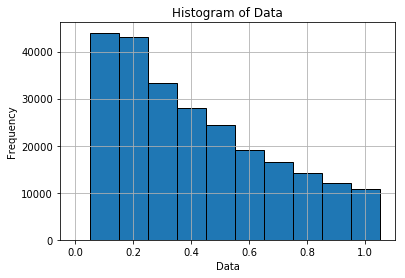

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure data only has values every 0.1
data = np.round(data, 1)
print(np.unique(data, return_counts=True))

# Plot the histogram with bin edges at intervals of 0.1
bin_edges = np.arange(data.min(), data.max() + 0.1, 0.1)
plt.hist(data, bins=bins_i_want, edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.grid(True)
plt.show()

In [184]:
bins_i_want = [0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]

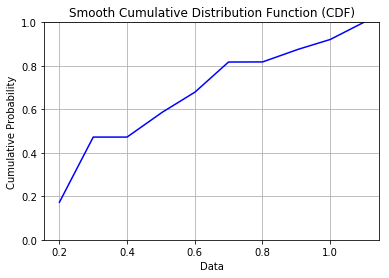

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate example data (replace this with your own data)
data = rounded_data
# Compute the histogram
hist, bin_edges = np.histogram(data, bins=bin_edges, density=True)

# Calculate the cumulative sum of the histogram values
cumulative_prob = np.cumsum(hist * np.diff(bin_edges))

# Normalize the cumulative probabilities to ensure CDF starts at 0 and ends at 1
cumulative_prob /= cumulative_prob[-1]

# Linearly interpolate the CDF
cdf_interp = interp1d(bin_edges[1:], cumulative_prob, kind='linear')

# Plot the smooth CDF
x_smooth = np.linspace(bin_edges[1], bin_edges[-1], 1000)
plt.plot(x_smooth, cdf_interp(x_smooth), 'b-')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Smooth Cumulative Distribution Function (CDF)')

# Show grid
plt.grid(True)

# Set y-axis limits to ensure it starts at 0 and ends at 1
plt.ylim(0, 1)

# Show the plot
plt.show()
